In [1]:
import time
import numpy as np
from robot_properties_talos.config import TalosConfig
from robot_properties_talos.taloswrapper import TalosRobot
from mpc.abstract_cyclic_gen1 import AbstractGaitGen

from controllers.robot_id_controller import InverseDynamicsController
from envs.pybullet_env import PyBulletEnv

import pinocchio as pin

import numpy as np
from motions.cyclic.talos_stand import still
from motions.weight_abstract import BiconvexMotionParams



<frozen importlib._bootstrap>:219: RuntimeWarning: to-Python converter for boost::shared_ptr<hpp::fcl::CollisionGeometry> already registered; second conversion method ignored.
pybullet build time: Dec  1 2021 18:33:43


In [2]:
robot = TalosConfig.buildRobotWrapper()
rmodel = robot.model
rdata = robot.data
viz = pin.visualize.MeshcatVisualizer(robot.model, robot.collision_model, robot.visual_model)
viz.initViewer(open=False)
viz.loadViewerModel()

You can open the visualizer by visiting the following URL:
http://127.0.0.1:7000/static/


In [ ]:
## robot config and init
pin_robot = TalosConfig.buildRobotWrapper()
urdf_path = TalosConfig.urdf_path

eff_names = ["leg_right_sole1_fix_joint", "leg_right_sole2_fix_joint", "leg_right_sole3_fix_joint", "leg_right_sole4_fix_joint", \
             "leg_left_sole1_fix_joint", "leg_left_sole2_fix_joint", "leg_left_sole3_fix_joint", "leg_left_sole4_fix_joint"]
hip_names = 4*["leg_right_1_joint",] + 4*["leg_left_1_joint",]

# eff_names = ["l_leg_akx", "r_leg_akx"]
# hip_names = ["l_leg_hpz", "r_leg_hpz"]
n_eff = len(eff_names)

q0 = np.array(TalosConfig.initial_configuration)

v0 = pin.utils.zero(pin_robot.model.nv)
x0 = np.concatenate([q0, pin.utils.zero(pin_robot.model.nv)])

v_des = np.array([0.0,0.0,0.0])
w_des = 0.0

plan_freq = 2 # sec
update_time = 0.0 # sec (time of lag)

In [ ]:
gg = AbstractGaitGen(urdf_path, eff_names, hip_names, x0, plan_freq, q0)

In [36]:
walk = BiconvexMotionParams("Talos", "walk")

# Cnt
walk.gait_period = 0.8
walk.stance_percent = 4*[0.6,] + 4*[0.6,]
walk.gait_dt = 0.1
walk.phase_offset = 4*[0.3,] + 4*[0.8,]

# IK
walk.state_wt = np.array([1e0, 1e4, 1e4] + [1e3] * 3 + \
                    [1e3,1e5,5e3,2e3,1e3,1e3] + \
                    [1e3,1e5,5e3,2e3,1e3,1e3] + \
                    2*[1e5,] +  \
                    4*[1e3,] + 3*[1e3,] + \
                    4*[1e3,] + 3*[1e3,] \
                         + [1e1] * 3 + [1e3] * 3 + [1e0] *(pin_robot.model.nv - 6))

walk.ctrl_wt = [0, 0, 1] + [5e2, 5e2, 5e2] + [5e2] *(rmodel.nv - 6)

walk.swing_wt = [1e4, 1e3]
walk.cent_wt = [1e+6, 1e-1]
walk.step_ht = 0.02
walk.nom_ht = 0.9
walk.reg_wt = [5e-2, 1e-5]


# Dyn
walk.W_X =     np.array([1e4, 1e4, 1e+5, 1e+3, 1e+2, 2e+2, 1e+4, 5e+4, 1e4])
walk.W_X_ter = 10.*np.array([1e+5, 1e5, 1e+5, 1e+1, 1e+1, 2e+2, 1e+5, 1e+5, 1e+5])
walk.W_F = np.array(8*[1e1, 1e1,5e1])
walk.rho = 1e4

walk.ori_correction = [0.2, 0.2, 0.2]
walk.gait_horizon = 3.5

# Gains
walk.kp = np.array([1e3,1e3,5e3,2e3,5e3,1e3] + # left leg
                    [1e3,1e3,5e3,2e3,5e3,1e3] + # right leg
                    2*[1e5,] +  # torso
                    4*[2e2,] + 3*[1e1,] + # left hand 
                    4*[2e2,] + 3*[1e1,]) # right hand

walk.kd = np.array(2*[5e1,5e1,5e1,2e1,1e1,1e1] + 
              2*[1.0e1,] + 
              4*[5e0,] + 3*[1e-1,] + 
              4*[5e0,] + 3*[1e0,])

In [37]:
gg.update_gait_params(walk, 0)

Initialized Kino-Dyn planner


In [7]:
viz.viewer.jupyter_cell()

time 0.0
Node# 0
leg_right_sole1_fix_joint
[ 1.    -0.109 -0.135  0.   ]
leg_right_sole2_fix_joint
[ 1.     0.111 -0.135  0.   ]
leg_right_sole3_fix_joint
[ 1.    -0.109 -0.035 -0.   ]
leg_right_sole4_fix_joint
[ 1.     0.111 -0.035 -0.   ]
leg_left_sole1_fix_joint
[ 0.    -0.109  0.035  0.   ]
leg_left_sole2_fix_joint
[0.    0.111 0.035 0.   ]
leg_left_sole3_fix_joint
[ 0.    -0.109  0.135 -0.   ]
leg_left_sole4_fix_joint
[ 0.     0.111  0.135 -0.   ]
Node# 1
leg_right_sole1_fix_joint
[ 1.    -0.109 -0.135  0.   ]
leg_right_sole2_fix_joint
[ 1.     0.111 -0.135  0.   ]
leg_right_sole3_fix_joint
[ 1.    -0.109 -0.035 -0.   ]
leg_right_sole4_fix_joint
[ 1.     0.111 -0.035 -0.   ]
leg_left_sole1_fix_joint
[ 0.    -0.089  0.035  0.   ]
leg_left_sole2_fix_joint
[0.    0.131 0.035 0.   ]
leg_left_sole3_fix_joint
[ 0.    -0.089  0.135  0.   ]
leg_left_sole4_fix_joint
[0.    0.131 0.135 0.   ]
Node# 2
leg_right_sole1_fix_joint
[ 1.    -0.109 -0.135  0.   ]
leg_right_sole2_fix_joint
[ 1.     

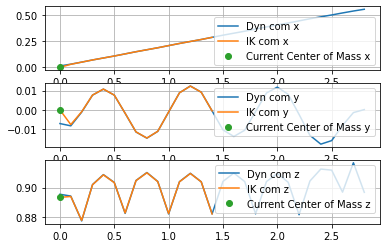

IndexError: index 1999 is out of bounds for axis 0 with size 1300

In [38]:
sim_t = 0.0
sim_dt = 0.001
index = 0
pln_ctr = 0
q = q0
v = v0

for o in range(2):
    xs, us, f = gg.optimize(q, v, sim_t, v_des, w_des)
    gg.plot(q, v)
    for ind in range(len(xs)):
        viz.display(xs[ind][:robot.model.nq])
        time.sleep(0.001)
    sim_t += plan_freq
    q = xs[int(plan_freq/sim_dt)-1][0:pin_robot.model.nq].copy()
    v = xs[int(plan_freq/sim_dt)-1][pin_robot.model.nq:].copy()


In [ ]:
i = 0
for names in rmodel.names[2:]:
    print(i, names)
    i += 1
print(i, rmodel.nq-7)

In [ ]:
rmodel.getFrameId("leg_right_sole_fix_joint")

In [ ]:
rmodel

In [ ]:
rmodel.nq - 7